<a href="https://colab.research.google.com/github/jscienciadados/metodos-ensemble/blob/main/Metodos_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning
## Métodos Ensemble

## Bagging

Bagging é usado para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de diferentes subsets no dataset de treino.

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Um classificador Bagging é um meta-estimador ensemble que faz o fit de classificadores base, cada um em subconjuntos aleatórios do conjunto de dados original e, em seguida, agrega suas previsões individuais (por votação ou por média) para formar uma previsão final.

Tal meta-estimador pode tipicamente ser usado como uma maneira de reduzir a variância de um estimador (por exemplo, uma árvore de decisão), introduzindo a randomização em seu procedimento de construção e fazendo um ensemble (conjunto) a partir dele.

In [1]:
# Imports
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Trabalhando com o dataset Dígitos escritos à mão

In [2]:
# Carga dos Dados
digits = load_digits()

<Figure size 432x288 with 0 Axes>

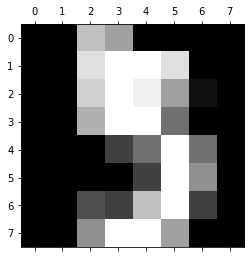

In [4]:
# Impressão de um dígito
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[5])
plt.show()


# Pré-Processameno

In [5]:
# Coloca os dados na mesma escala
data = scale(digits.data)

In [6]:
# Variaveis preditoras e variavel target
X = data
y = digits.target

# Classificador

In [7]:
# Construção do Classificador
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)



In [8]:
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

# Avaliação

In [9]:
# score
score = cross_val_score(bagging, X, y)

In [10]:
# Media dos scores
mean = score.mean()

In [11]:
print(score)

[0.91944444 0.92222222 0.95543175 0.98050139 0.93036212]


In [12]:
print(mean)

0.9415923862581244


Extremely Randomized Trees (ExtraTrees)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [13]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score



# Dígitos Escritos à Mão

In [14]:
# Cria o classificador com uma árvore de decisão
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)



[0.78055556 0.71388889 0.80779944 0.8356546  0.79665738]
0.7869111730114515


In [15]:
# Cria o classificador com Random Forest
clf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)



[0.89166667 0.88055556 0.91643454 0.93036212 0.90807799]
0.9054193748065614


In [16]:
# Cria o classificador com Extra Tree
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)



[0.90277778 0.86944444 0.93593315 0.95264624 0.91364903]
0.9148901268956979


## **Adaboost**

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Um classificador AdaBoost é um meta-estimador que começa ajustando um classificador no conjunto de dados original e depois ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados para que os classificadores subsequentes se concentrem mais em casos difíceis.

In [17]:
# Import
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score



In [18]:
# Carregandos os dados
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart = fetch_openml("heart")



In [19]:
heart

{'DESCR': '**Author**: Laboratory of Artificial Intelligence and Computer Science of the University of Porto (LIACC)  \nlibSVM","AAD group  \n**Source**: [original](http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html) - Date unknown  \n**Please cite**:   \n\n#Dataset from the LIBSVM data repository.\n\nPreprocessing: scaled to [-1,1]\n\nDownloaded from openml.org.',
 'categories': {},
 'data': <270x13 sparse matrix of type '<class 'numpy.float64'>'
 	with 3378 stored elements in Compressed Sparse Row format>,
 'details': {'contributor': ['libSVM', 'AAD group'],
  'creator': 'Laboratory of Artificial Intelligence and Computer Science of the University of Porto (LIACC)',
  'default_target_attribute': 'class',
  'description_version': '1',
  'file_id': '1594038',
  'format': 'Sparse_ARFF',
  'id': '1574',
  'licence': 'Public',
  'md5_checksum': 'f50ad5f44a5aa587e7f3794007182eb2',
  'minio_url': 'http://openml1.win.tue.nl/dataset1574/dataset_1574.pq',
  'name': 'heart',
  '

In [20]:
# Obtendo os dados 
X = heart.data
y = np.copy(heart.target)
y[y == -1] = 0



In [21]:
X

<270x13 sparse matrix of type '<class 'numpy.float64'>'
	with 3378 stored elements in Compressed Sparse Row format>

In [22]:
y

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [23]:
# Datasets de treino e de teste
X_test, y_test = X[189:], y[189:]
X_train, y_train = X[:189], y[:189]



# Uma DecisionTree como algoritmo base para o Addaboost

In [24]:
# Construindo o estimador base
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)



In [25]:
# Construindo a primeira versão do modelo Adaboost
ada_clf_v1 = AdaBoostClassifier(base_estimator = estim_base,
                                learning_rate = 0.1,
                                n_estimators = 400,
                                algorithm = "SAMME")



In [26]:
# Treinamento do modelo
ada_clf_v1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

# Avaliação

In [27]:
# Score
scores = cross_val_score(ada_clf_v1, X_test, y_test)
print(scores)
means = scores.mean()
print(means)



[0.88235294 0.9375     0.875      0.75       0.6875    ]
0.8264705882352942


In [28]:
# Construindo a segunda versão do modelo Adaboost
ada_clf_v2 = AdaBoostClassifier(base_estimator = estim_base,
                                learning_rate = 1.0,
                                n_estimators = 400,
                                algorithm = "SAMME")



In [29]:
# Treino
ada_clf_v2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [31]:
# Score
scores = cross_val_score(ada_clf_v2, X_test, y_test)
print(scores)
means = scores.mean()
print(means)

[0.82352941 0.875      0.8125     0.8125     0.75      ]
0.8147058823529412
